In [96]:
#import libraries
#Library Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.neighbors
import scipy.stats
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
import math

import mpl_toolkits.basemap
import scipy.stats
import seaborn
import sklearn.model_selection
import sklearn.neighbors

In [97]:
#Loading Data
S_O_20 = pd.read_csv("Earthquake_2020_9_2020_10_filtered.csv")
N_D_20 = pd.read_csv("Earthquake_2020_11_2020_12_filtered.csv")
J_F_21 = pd.read_csv("Earthquake_2021_1_2021_2_filtered.csv")
M_A_21 = pd.read_csv("Earthquake_2021_3_2021_4_filtered.csv")
M_J_21 = pd.read_csv("Earthquake_2021_5_2021_6_filtered.csv")
J_A_21 = pd.read_csv("Earthquake_2021_7_2021_8_filtered.csv")
S_O_21 = pd.read_csv("Earthquake_2021_9_2021_10_filtered.csv")
N_D_21 = pd.read_csv("Earthquake_2021_11_2021_12_filtered.csv")
J_F_22 = pd.read_csv("Earthquake_2022_1_2022_2_filtered.csv")
M_A_22 = pd.read_csv("Earthquake_2022_3_2022_4_filtered.csv")
M_J_22 = pd.read_csv("Earthquake_2022_5_2022_6_filtered.csv")
J_A_22 = pd.read_csv("Earthquake_2022_7_2022_8_filtered.csv")

# Creating Sets for Pictures
set1 = [S_O_20, N_D_20, J_F_21]
set2 = [N_D_20, J_F_21, M_A_21]
set3 = [J_F_21, M_A_21, M_J_21]
set4 = [M_A_21, M_J_21, J_A_21]
set5 = [M_J_21, J_A_21, S_O_21]
set6 = [J_A_21, S_O_21, N_D_21]
set7 = [S_O_21, N_D_21, J_F_22]
set8 = [N_D_21, J_F_22, M_A_22]
set9 = [J_F_22, M_A_22, M_J_22]
set10 = [M_A_22, M_J_22, J_A_22]

Set1 = pd.concat(set1)
Set2 = pd.concat(set2)
Set3 = pd.concat(set3)
Set4 = pd.concat(set4)
Set5 = pd.concat(set5)
Set6 = pd.concat(set6)
Set7 = pd.concat(set7)
Set8 = pd.concat(set8)
Set9 = pd.concat(set9)
Set10 = pd.concat(set10)

Dictionary = dict()
Dictionary = { 1: Set1, 2:Set2, 3:Set3, 4:Set4, 5:Set5, 6:Set6, 7:Set7, 8:Set8, 9:Set9, 10:Set10 }

In [98]:
#Storing the clusters
#Store the center of the clusters 
#Store the average distance from center of the cluster
#Store the average magnitude of the values in the cluster


#Create Test Subject
PDataset = Set1.iloc[1:10,:]
print(PDataset)


def Center(x):
    meanLat = x['latitude'].mean()
    meanLong = x['longitude'].mean()
    return meanLat, meanLong

#sqrt(lat^2 + long^2)
#Get cluster one values and run this
#Did this since its computationally faster than trying to find the area and if it
# increases the cluster is growing if it decreases the cluster size is shrinking 



def DistCenter(x):
    distance = 0 
    LatDist = x['latitude'].var()
    LongDist = x['longitude'].var()
    distance =  LatDist + LongDist
    return distance

def MagPerCL(x):
    return(x['mag'].mean())

                       time   latitude  longitude  depth   mag
1  2020-09-01T00:36:59.811Z  38.003900  -118.2358   6.60  3.40
2  2020-09-01T01:39:34.960Z  36.394333  -120.4370   9.19  2.87
3  2020-09-01T02:25:49.130Z  42.370000  -118.4440   8.45  3.52
4  2020-09-01T05:51:36.757Z  38.179800  -117.8634   9.20  3.30
5  2020-09-01T08:51:26.458Z  38.175900  -117.8014   5.80  2.80
6  2020-09-01T09:08:48.644Z  43.779900  -107.6074  10.00  2.80
7  2020-09-01T16:56:23.593Z  38.200200  -117.7724  10.00  2.50
8  2020-09-01T18:59:44.436Z  43.801700  -105.5253   0.00  3.30
9  2020-09-01T20:02:10.047Z  44.477200  -115.2000  13.23  3.20


In [99]:
#--------------DBSCAN Clustering-------------------#
import sklearn
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from collections import Counter
from sklearn.preprocessing import StandardScaler

#.25 = eps, 64 = minsamples DEFAULT

def dbscan(dataset, epsilon, minsamples):
    dbscan_data = dataset[['latitude','longitude']]
    dbscan_data = dbscan_data.values.astype('float32', copy = False)
    dbscan_data_scaler = StandardScaler().fit(dbscan_data)
    dbscan_data = dbscan_data_scaler.transform(dbscan_data)

    model1 = DBSCAN(eps=epsilon, min_samples=minsamples, metric='euclidean').\
    fit(dbscan_data)

    outliers_df = dataset[model1.labels_ == -1]
    num_clusters = len(set(model1.labels_))

    clusters_df = [dataset[model1.labels_ == n] for n in range(num_clusters)] 

    colors = model1.labels_
    color_clusters = colors[colors != -1]
    color_outliers = 'white'
    clusters1 = Counter(model1.labels_)
    return clusters_df
    
def dbscanplot(dataset, epsilon, minsamples):
    dbscan_data = dataset[['latitude','longitude']]
    dbscan_data = dbscan_data.values.astype('float32', copy = False)
    dbscan_data_scaler = StandardScaler().fit(dbscan_data)
    dbscan_data = dbscan_data_scaler.transform(dbscan_data)
    #return dbscan_data
    model1 = DBSCAN(eps=epsilon, min_samples=minsamples, metric='euclidean').\
    fit(dbscan_data)
    #return model1
    outliers_df = dataset[model1.labels_ == -1]
    clusters_df = dataset[model1.labels_ != -1]
    #return model1.labels_
    colors = model1.labels_
    color_clusters = colors[colors != -1]
    color_outliers = 'white'
    clusters1 = Counter(model1.labels_)
    print(clusters1)
    #print(dataset[model1.labels_ == -1].head())
    print('number of clusters: {}'.format(len(clusters1)-1))
    dbscan_plot(clusters_df,color_clusters)

def dbscan_plot(cluster,cluster_colors):
    fig = plt.figure()
    ax = fig.add_axes([.2,.2,2,2])
    ax.scatter(cluster['latitude'], cluster['longitude'],
    c = cluster_colors, edgecolors = 'black', s = 70)
    ax.set_xlabel('Latitude', fontsize=10)
    ax.set_ylabel('Longitude', fontsize=10)
    plt.title('title',fontsize=12)
    plt.grid(which='major',color='#cccccc', alpha=0.45)
    plt.show()

    
#print(dbscan(Set1, .15, 50))

In [100]:
#-------------finds hotspots using d1 and d2 thresholds-----------#

d1 = 200
d2 = 80

# find hotspots with high density threshold
def findHighHotspots(dataset): 
    df = dbscan(dataset, .15, 50)
    clusters_df = pd.DataFrame()
    for n in range(len(df)):
        n_cluster = df[n]
        if n_cluster.shape[0] >= d1:
            clusters_df = clusters_df.append(n_cluster)
    return clusters_df

#print(findHighHotspots(Set1))
#dbscanplot(findHighHotspots(Set1), .15, 50)

def findMediumHighHotspots(dataset): 
    df = dbscan(dataset, .15, 50)
    clusters_df = pd.DataFrame()
    for n in range(len(df)):
        n_cluster = df[n]
        if n_cluster.shape[0] < d1 and n_cluster.shape[0] >= d2:
            clusters_df = clusters_df.append(n_cluster)
    return clusters_df

#print(findMediumHighHotspots(Set1))
#dbscanplot(findMediumHighHotspots(Set1), .15, 50)

Set  1
Set  1  information
Number of hotspots : 10
Hotspot Center (Lat, Long):  (38.08898145013772, -118.12192369146013)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.18877081764650575
Avg Magnitude of Earthquakes in the hotspot:  2.936914600550964
Hotspot Center (Lat, Long):  (36.8140347978022, -121.36532235054949)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.734654768058884
Avg Magnitude of Earthquakes in the hotspot:  2.87142857142857
Hotspot Center (Lat, Long):  (43.72617234042554, -105.35486382978722)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.05992874527289512
Avg Magnitude of Earthquakes in the hotspot:  3.1765957446808506
Hotspot Center (Lat, Long):  (44.34409155555554, -115.1288653333334)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.0518846448373015
Avg Magnitude of Earthquakes in the hotspot:  2.8026666666666693
Hotspot Center (Lat, Long):  (31.632328328051965, -104.14499092987015)
Spread of Hotspot (Var of Lat 

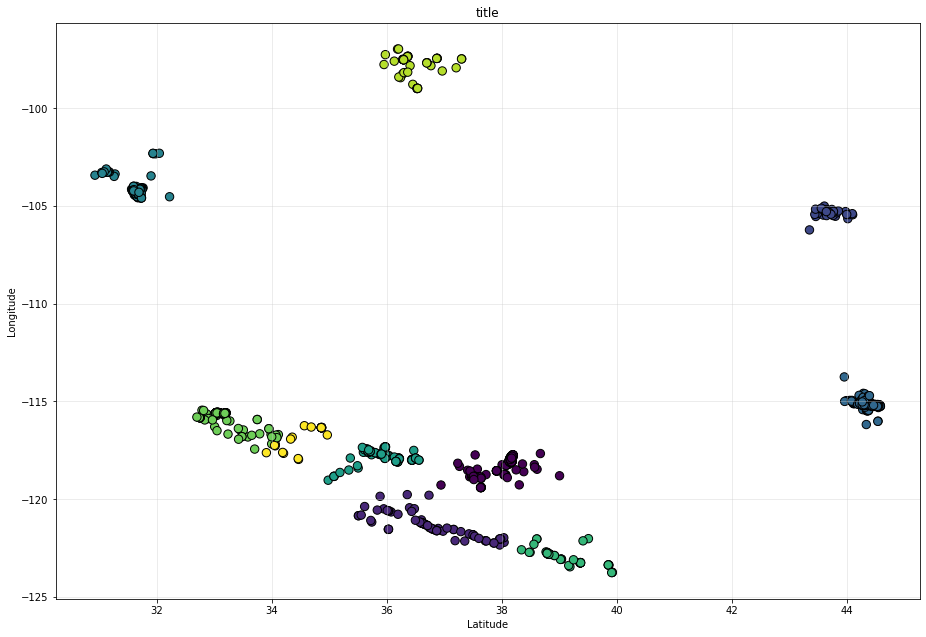

Set  2
Set  2  information
Number of hotspots : 9
Hotspot Center (Lat, Long):  (31.637276037393605, -104.13126792340427)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.33672549101732313
Avg Magnitude of Earthquakes in the hotspot:  2.8218085106382986
Hotspot Center (Lat, Long):  (44.34132731707317, -115.12713902439026)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.05606705056288844
Avg Magnitude of Earthquakes in the hotspot:  2.7907317073170734
Hotspot Center (Lat, Long):  (38.81768841014494, -122.74644927391307)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.39421373518658126
Avg Magnitude of Earthquakes in the hotspot:  2.926376811594203
Hotspot Center (Lat, Long):  (43.79216060606059, -105.38524090909088)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.16120036149417244
Avg Magnitude of Earthquakes in the hotspot:  3.134848484848485
Hotspot Center (Lat, Long):  (38.08205753440231, -118.13007676530619)
Spread of Hotspot (Var of

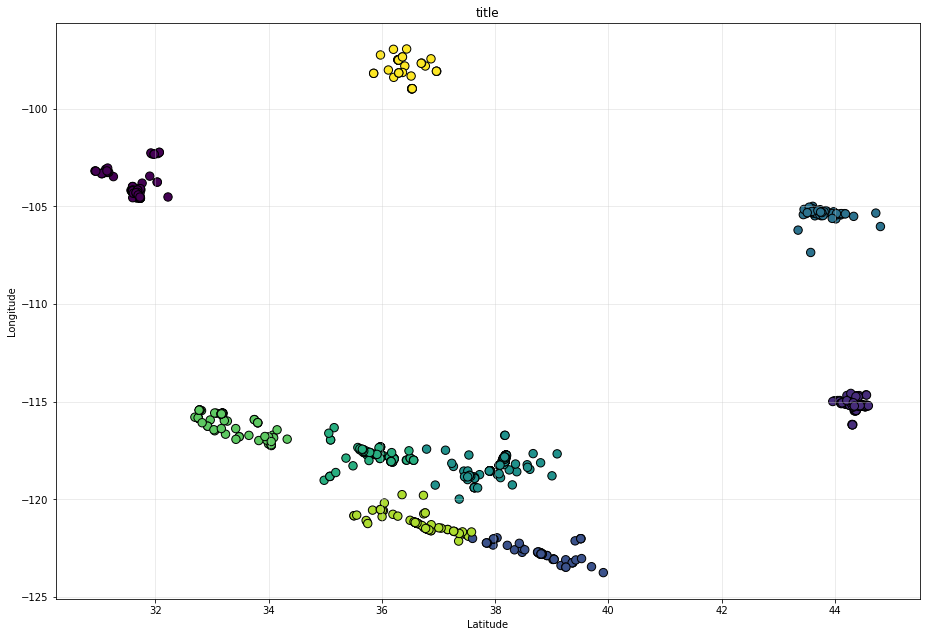

Set  3
Set  3  information
Number of hotspots : 8
Hotspot Center (Lat, Long):  (44.337147107437985, -115.11412644628096)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.08517593264049589
Avg Magnitude of Earthquakes in the hotspot:  2.7900826446280993
Hotspot Center (Lat, Long):  (33.18998127285713, -115.76388936333332)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.21349509968542107
Avg Magnitude of Earthquakes in the hotspot:  2.9813366666666656
Hotspot Center (Lat, Long):  (37.31875416969697, -118.00635440833331)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 1.4135708408780967
Avg Magnitude of Earthquakes in the hotspot:  2.913333333333335
Hotspot Center (Lat, Long):  (43.791298529411755, -105.38621911764699)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.15546448917910455
Avg Magnitude of Earthquakes in the hotspot:  3.13235294117647
Hotspot Center (Lat, Long):  (31.621828206206896, -104.26983983534481)
Spread of Hotspot (Var of

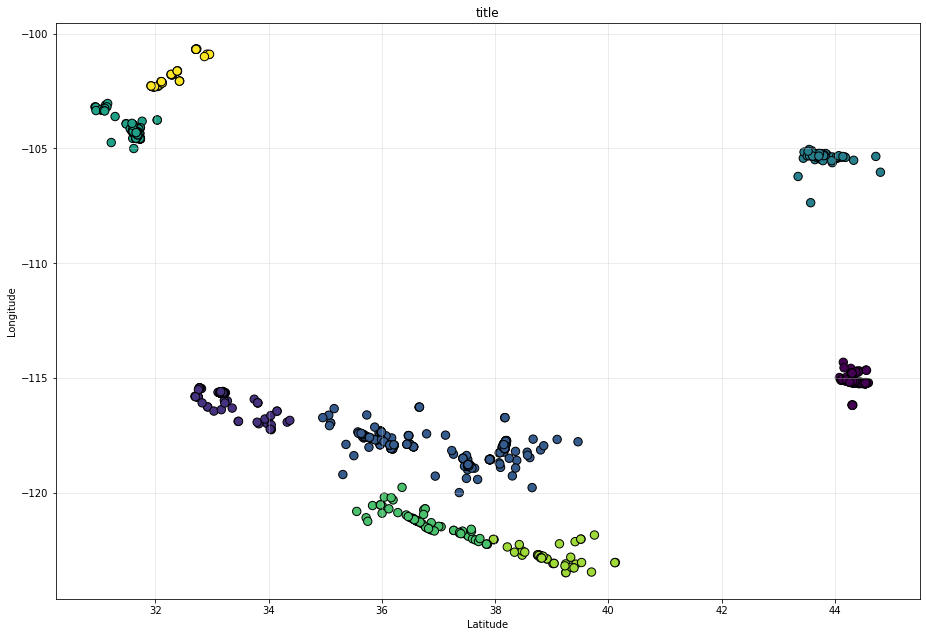

Set  4
Set  4  information
Number of hotspots : 9
Hotspot Center (Lat, Long):  (44.34340520833333, -115.13849895833334)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.10900163112938634
Avg Magnitude of Earthquakes in the hotspot:  2.794791666666665
Hotspot Center (Lat, Long):  (31.623772782086625, -104.25142816417325)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.14489113805841683
Avg Magnitude of Earthquakes in the hotspot:  2.846850393700789
Hotspot Center (Lat, Long):  (33.27890912169811, -115.93555786037737)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.5550574339709006
Avg Magnitude of Earthquakes in the hotspot:  2.973871226415092
Hotspot Center (Lat, Long):  (35.91877666, -117.60610999857147)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.5615224596805518
Avg Magnitude of Earthquakes in the hotspot:  2.8975714285714282
Hotspot Center (Lat, Long):  (39.22442535312499, -122.86724652500006)
Spread of Hotspot (Var of Lat and 

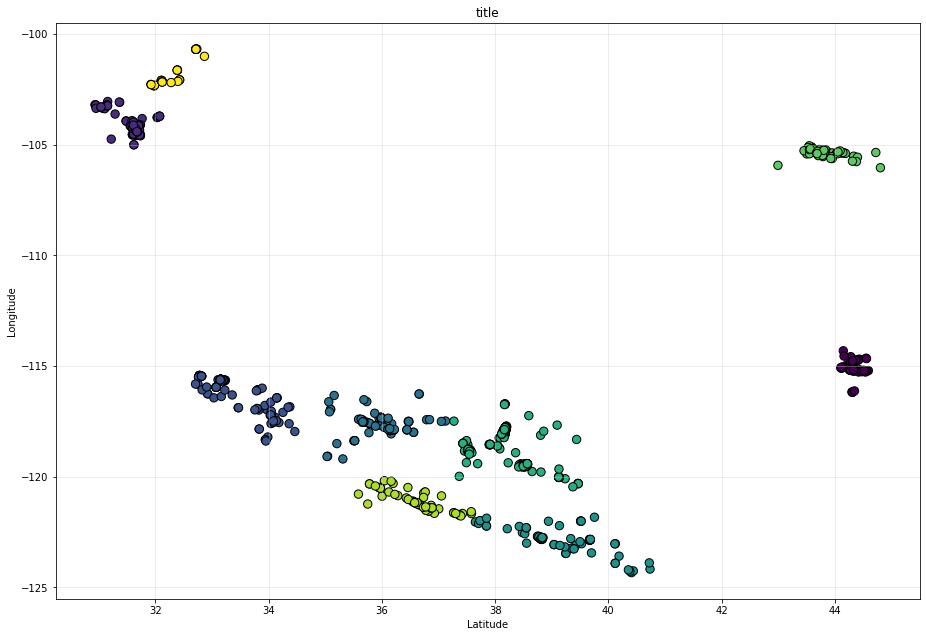

Set  5
Set  5  information
Number of hotspots : 8
Hotspot Center (Lat, Long):  (31.73020885652819, -103.90363779643911)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.9031016467362282
Avg Magnitude of Earthquakes in the hotspot:  2.860830860534128
Hotspot Center (Lat, Long):  (38.06040349999999, -119.00211246344539)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 1.5371140744659821
Avg Magnitude of Earthquakes in the hotspot:  2.9146848739495748
Hotspot Center (Lat, Long):  (43.76031967213115, -105.3665344262295)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.07853694923497274
Avg Magnitude of Earthquakes in the hotspot:  3.1114754098360646
Hotspot Center (Lat, Long):  (36.712871431428574, -121.19012856714286)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.6918407375537633
Avg Magnitude of Earthquakes in the hotspot:  2.980714285714285
Hotspot Center (Lat, Long):  (39.23076535131579, -122.84017324736841)
Spread of Hotspot (Var of Lat

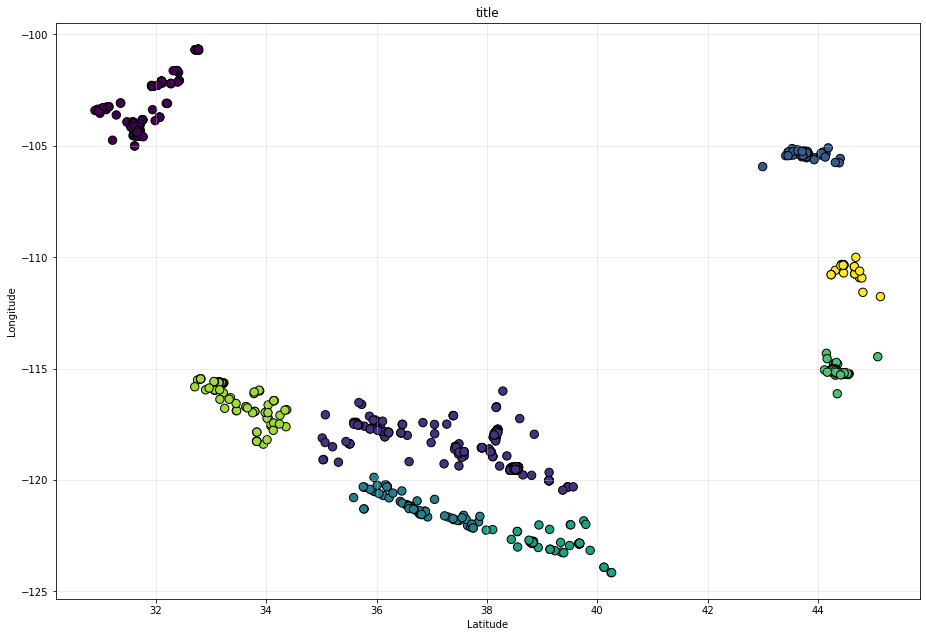

Set  6
Set  6  information
Number of hotspots : 9
Hotspot Center (Lat, Long):  (44.32994479999999, -115.1357)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.0324343415251615
Avg Magnitude of Earthquakes in the hotspot:  2.8152000000000004
Hotspot Center (Lat, Long):  (35.8141314076923, -117.79846154423078)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.4446784404807957
Avg Magnitude of Earthquakes in the hotspot:  2.90096153846154
Hotspot Center (Lat, Long):  (39.786670238571446, -123.50978452499996)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 1.157967067401669
Avg Magnitude of Earthquakes in the hotspot:  2.876142857142856
Hotspot Center (Lat, Long):  (43.777121126760555, -105.3765929577465)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.10471237263983896
Avg Magnitude of Earthquakes in the hotspot:  3.0619718309859154
Hotspot Center (Lat, Long):  (31.729243531558858, -103.87660032088236)
Spread of Hotspot (Var of Lat and Long p

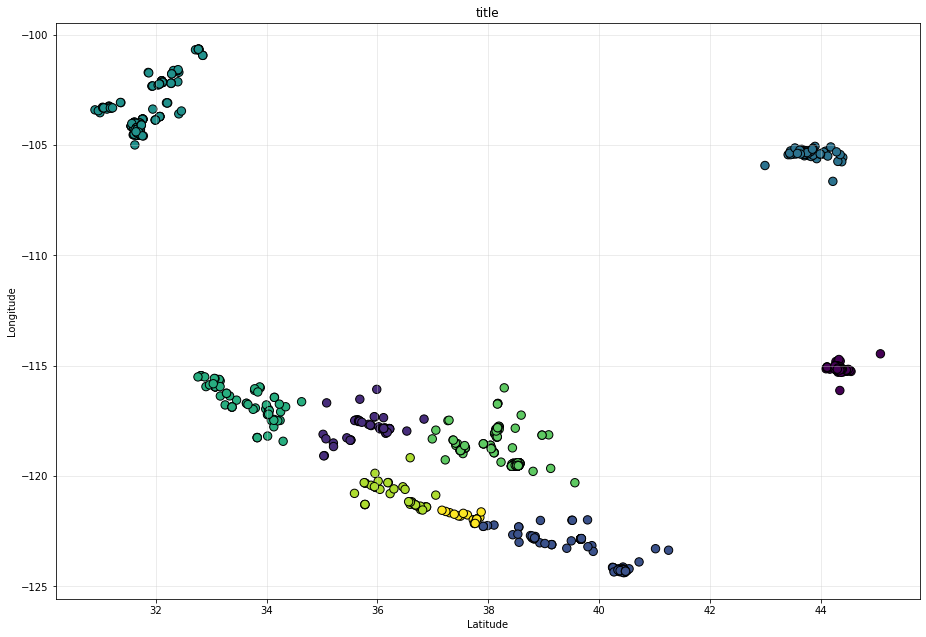

Set  7
Set  7  information
Number of hotspots : 9
Hotspot Center (Lat, Long):  (31.732645041597788, -103.85673751542703)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.9779330010933533
Avg Magnitude of Earthquakes in the hotspot:  2.88512396694215
Hotspot Center (Lat, Long):  (44.327380165289256, -115.12937190082648)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.02297303230716255
Avg Magnitude of Earthquakes in the hotspot:  2.810743801652893
Hotspot Center (Lat, Long):  (43.79238904109589, -105.34792602739726)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.07810136016362232
Avg Magnitude of Earthquakes in the hotspot:  3.0547945205479436
Hotspot Center (Lat, Long):  (39.871750666400004, -123.72850533519998)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 1.1267110591107812
Avg Magnitude of Earthquakes in the hotspot:  2.880559999999999
Hotspot Center (Lat, Long):  (38.090803186029405, -118.50162916470586)
Spread of Hotspot (Var of 

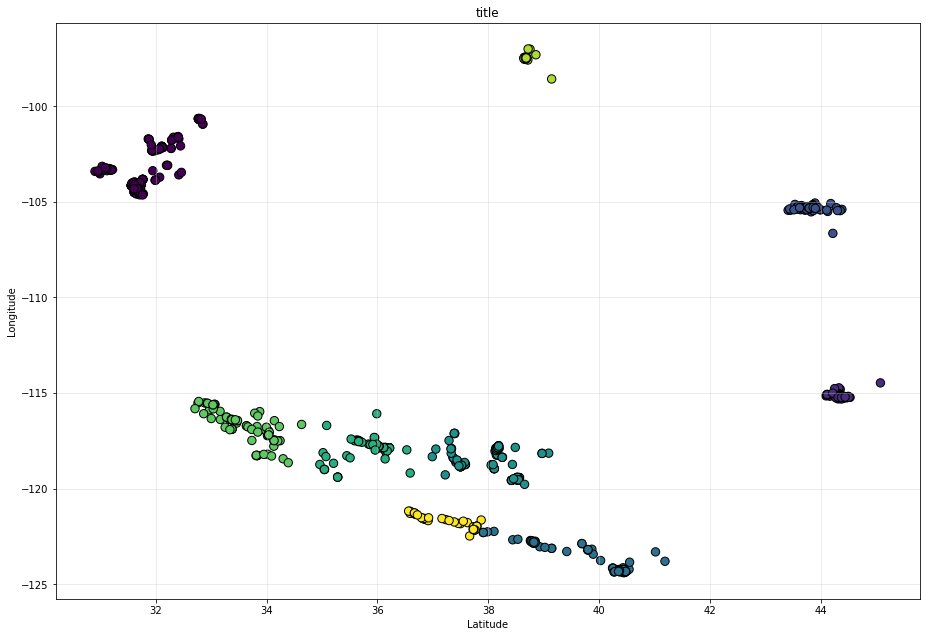

Set  8
Set  8  information
Number of hotspots : 10
Hotspot Center (Lat, Long):  (31.63586017864079, -104.25796340744338)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.12963302899049145
Avg Magnitude of Earthquakes in the hotspot:  2.869255663430425
Hotspot Center (Lat, Long):  (44.3238576923077, -115.16837307692305)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.02986694576423566
Avg Magnitude of Earthquakes in the hotspot:  2.7512820512820504
Hotspot Center (Lat, Long):  (43.84070860215053, -105.34720860215056)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.08228467311126683
Avg Magnitude of Earthquakes in the hotspot:  3.04516129032258
Hotspot Center (Lat, Long):  (40.06576208625953, -123.79974809312976)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.9320756843167861
Avg Magnitude of Earthquakes in the hotspot:  2.88854961832061
Hotspot Center (Lat, Long):  (38.07579166538463, -118.43005833173076)
Spread of Hotspot (Var of Lat 

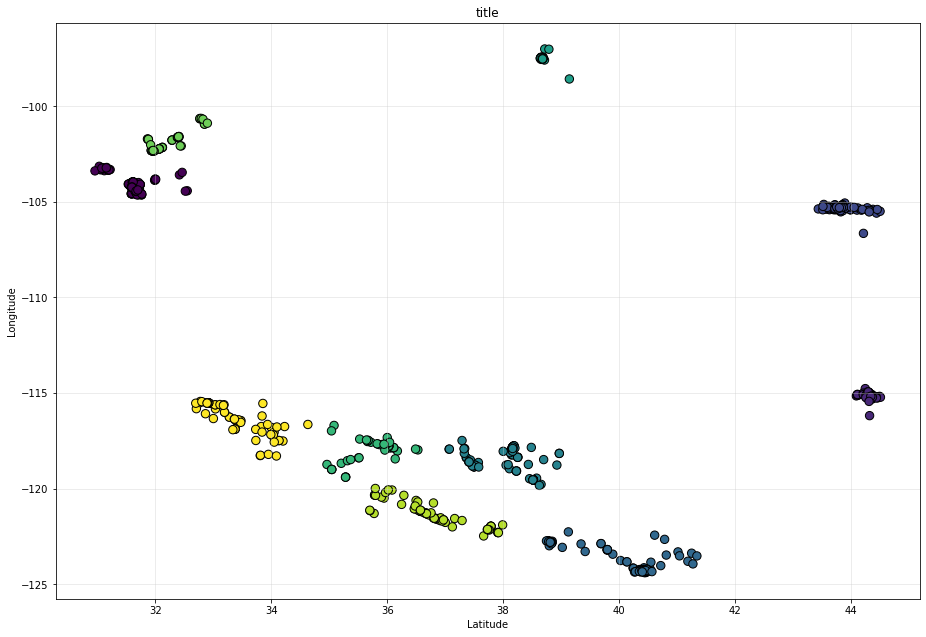

Set  9
Set  9  information
Number of hotspots : 9
Hotspot Center (Lat, Long):  (38.979057973913044, -122.77898912826083)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.16959196904697443
Avg Magnitude of Earthquakes in the hotspot:  2.8528260869565223
Hotspot Center (Lat, Long):  (38.00217155779817, -118.47465993853211)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.6003301510926173
Avg Magnitude of Earthquakes in the hotspot:  2.947798165137613
Hotspot Center (Lat, Long):  (43.85385061728396, -105.34193827160487)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.0676555301728394
Avg Magnitude of Earthquakes in the hotspot:  3.069135802469135
Hotspot Center (Lat, Long):  (31.720676313358027, -103.96799785432091)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.8126315917875708
Avg Magnitude of Earthquakes in the hotspot:  2.8464792569876587
Hotspot Center (Lat, Long):  (44.33712790697676, -115.22743488372093)
Spread of Hotspot (Var of L

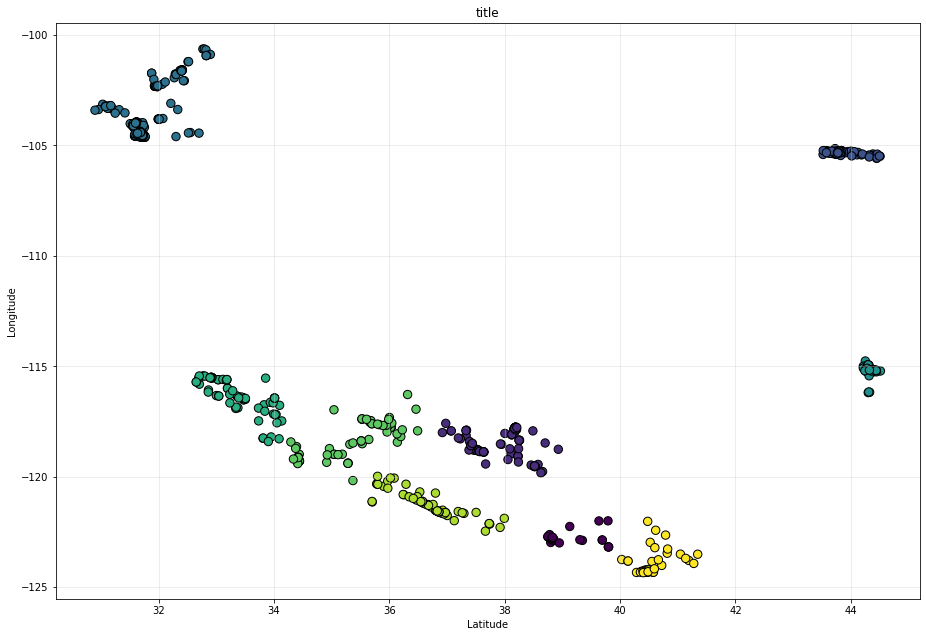

Set  10
Set  10  information
Number of hotspots : 9
Hotspot Center (Lat, Long):  (44.33228863636364, -115.2508272727273)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.18402460585095193
Avg Magnitude of Earthquakes in the hotspot:  2.7227272727272727
Hotspot Center (Lat, Long):  (31.657693495090914, -104.25385493688316)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.09830641433560745
Avg Magnitude of Earthquakes in the hotspot:  2.8323520300883147
Hotspot Center (Lat, Long):  (38.09713455504587, -118.7885030577981)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.6957456595291815
Avg Magnitude of Earthquakes in the hotspot:  2.8679816513761462
Hotspot Center (Lat, Long):  (33.34683574202899, -116.16875362608697)
Spread of Hotspot (Var of Lat and Long pts of the hotspot) 0.5418055736977663
Avg Magnitude of Earthquakes in the hotspot:  2.9194202898550743
Hotspot Center (Lat, Long):  (38.923666664285705, -122.69621031666664)
Spread of Hotspot (Var o

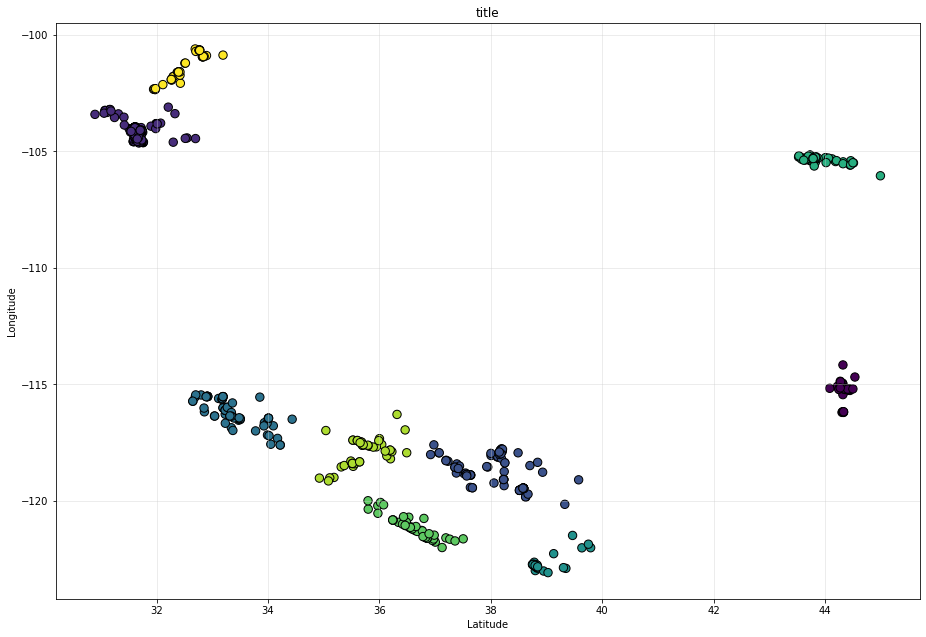

In [101]:
#-------------------Pipeline------------------#

#What do I want this pipleine to do
#For each cluster in image
#Output center an

#d distance from Center of the cluster

#Generate 10 images
#And then make animation of the 10 images
        # clustered_df = dbscan(DataFrame, .25, 64)

def pipeline(Dict, epi, mins):
    for key,DataFrame in Dict.items(): 
        print("Set ",key)
        cluster_list = dbscan(DataFrame,epi, mins)
        print("Set ", key, " information")
        print("Number of hotspots :" , len(cluster_list)-1)
        size = len(cluster_list)-1
        for i in range(size):
            print("Hotspot Center (Lat, Long): ", Center(cluster_list[i]))
            print("Spread of Hotspot (Var of Lat and Long pts of the hotspot)", DistCenter(cluster_list[i]))
            print("Avg Magnitude of Earthquakes in the hotspot: ", MagPerCL(cluster_list[i]))
            
        dbscanplot(DataFrame,epi, mins)

        #Plot into basemap 
        #Justin this is for u

pipeline(Dictionary, .15,35)


In [ ]:
# set up the data grid for the contour plot

hotspot1_Set1 = findHighHotspots(Set1)

ktest = hotspot1_Set1[['latitude', 'longitude']]

xgrid = np.sort(list(hotspot1_Set1['longitude']))
ygrid = np.sort(list(hotspot1_Set1['latitude']))
x, y = np.meshgrid(xgrid, ygrid)
print("X Grid Component:\n{}\n".format(x))
print("Y Grid Component:\n{}\n".format(y))

xy = np.vstack([y.ravel(), x.ravel()]).T

In [89]:
#----------HOTSPOT1 MAP SETUP-----------------#

def mapSetUp1(dataset):
    # set up the data grid for the contour plot #
    hotspot2 = findHighHotspots(dataset)
    ktest2 = hotspot2[['latitude', 'longitude']]
    
    xgrid2 = np.sort(list(dataset['longitude']))
    ygrid2 = np.sort(list(dataset['latitude']))
    x2, y2 = np.meshgrid(xgrid2, ygrid2)
    #print("X Grid Component:\n{}\n".format(x2))
    #print("Y Grid Component:\n{}\n".format(y2))

    xy2 = np.vstack([y2.ravel(), x2.ravel()]).T
    # run kernel density estimation for hotspot 2 #
    kde2 = sklearn.neighbors.KernelDensity(
        bandwidth=5, 
        metric='minkowski',
        kernel='gaussian', 
        algorithm='ball_tree'
    )
    kde2.fit(ktest2.values)

    # fit the trained model on the xy grid #
    log_density2 = kde2.score_samples(xy2)
    density2 = np.exp(log_density2)
    density2 = density2.reshape(x2.shape)
    #print("Shape of Density Values:\n{}\n".format(density2.shape))
    
    return x2, y2, density2


In [90]:
#---------------visualize the results for Hotspot 1----------------#
#PS takes a while to run
def visualizeMap(dataset):
    fig15 = plt.figure(figsize=(15, 15))


    the_map = mpl_toolkits.basemap.Basemap(
        projection='cyl',
        llcrnrlat=10, urcrnrlat=70,
        llcrnrlon=-150,urcrnrlon=-50,
        resolution='c'
    )

    the_map.drawcoastlines(linewidth=1)
    the_map.drawcountries(linewidth=1)
    the_map.drawstates(linewidth=1)

    """
    #turns polygons into points
    for i in hotspot1_Set1:
    the_map.scatter(hotspot1_Set1['longitude'], hotspot1_Set1['latitude'], latlon = True, s = 50, c = 'red')
    """
    
    hotspot_vals =  mapSetUp1(dataset)
    levels = np.linspace(0, hotspot_vals[2].max(), 25)
    plt.contourf(hotspot_vals[0], hotspot_vals[1], hotspot_vals[2], levels=levels, cmap=plt.cm.Reds)

    plt.show()

In [81]:
########################start of high hotspot########################

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)
C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)
C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


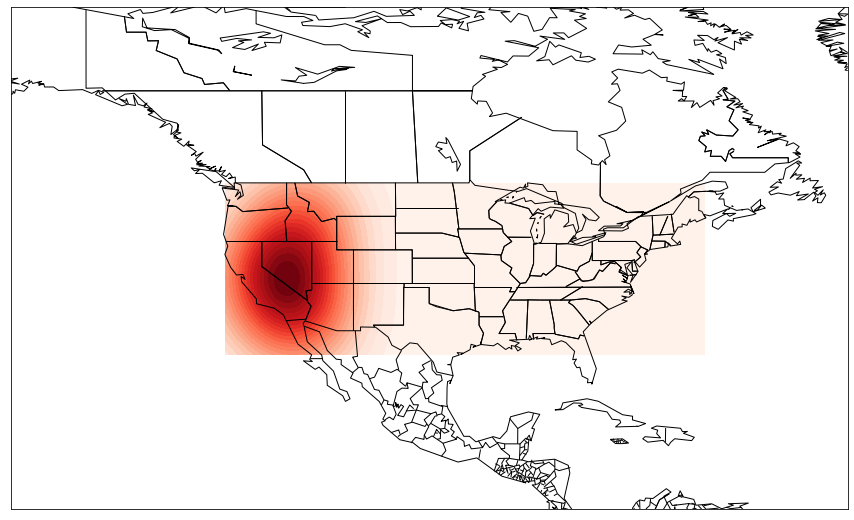

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)
C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


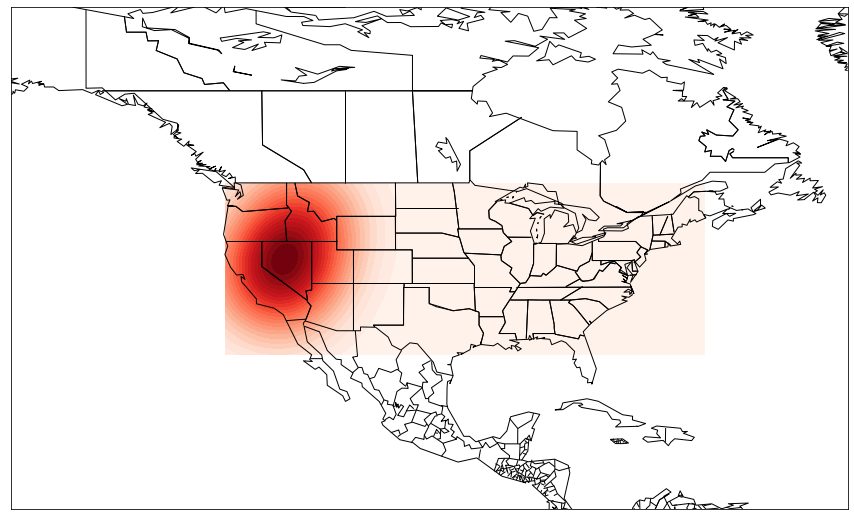

(None, None)

In [91]:
visualizeMap(Set1), visualizeMap(Set2)

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)
C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)
C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


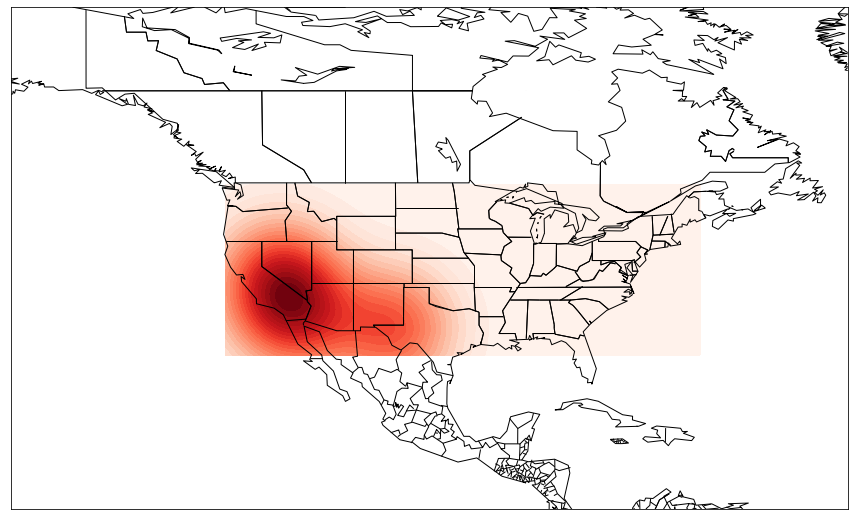

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)
C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


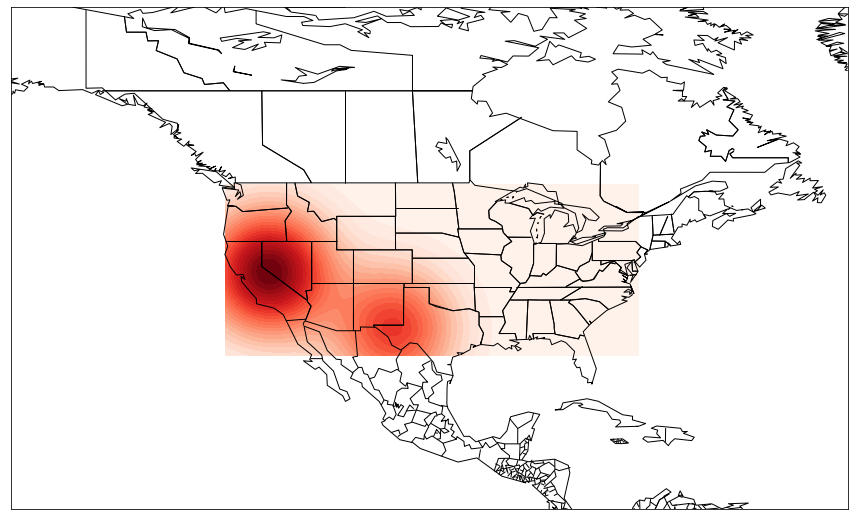

(None, None)

In [92]:
visualizeMap(Set3), visualizeMap(Set4)

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)
C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


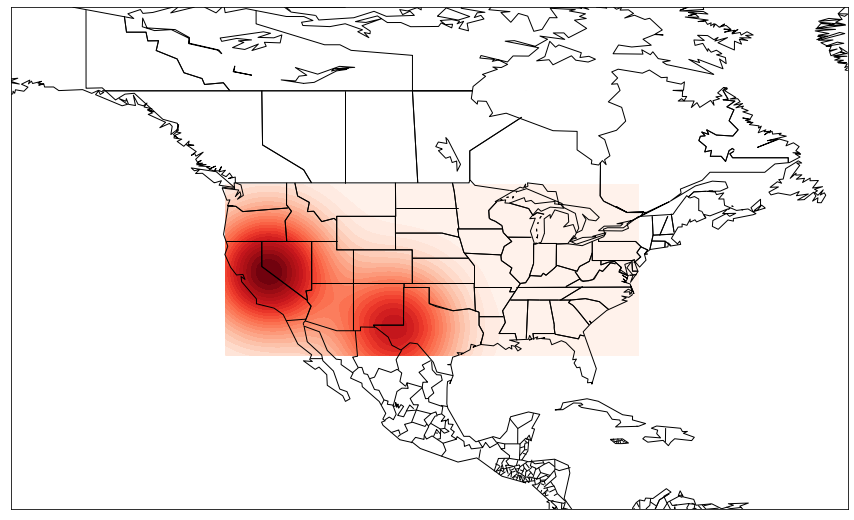

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)
C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


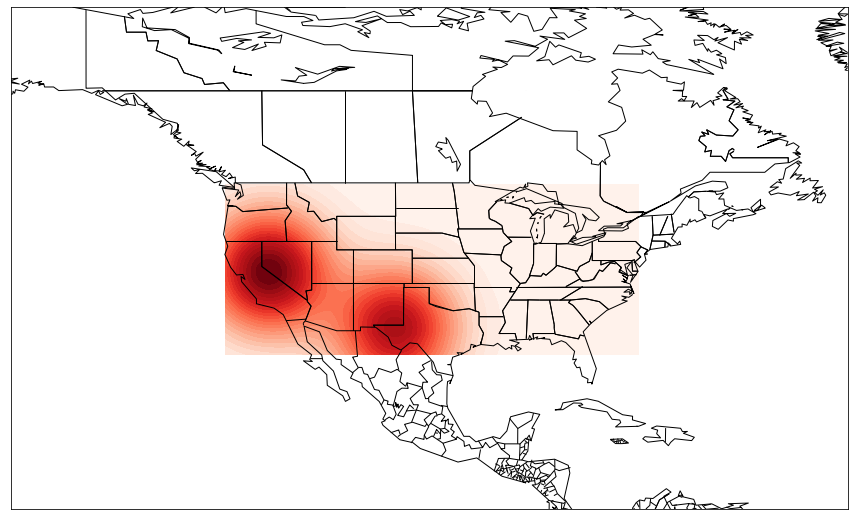

(None, None)

In [93]:
visualizeMap(Set5), visualizeMap(Set6)

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


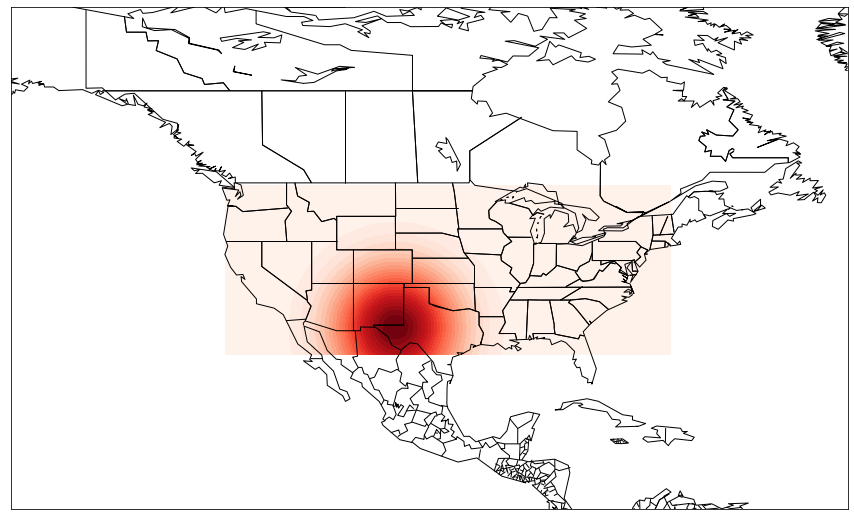

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


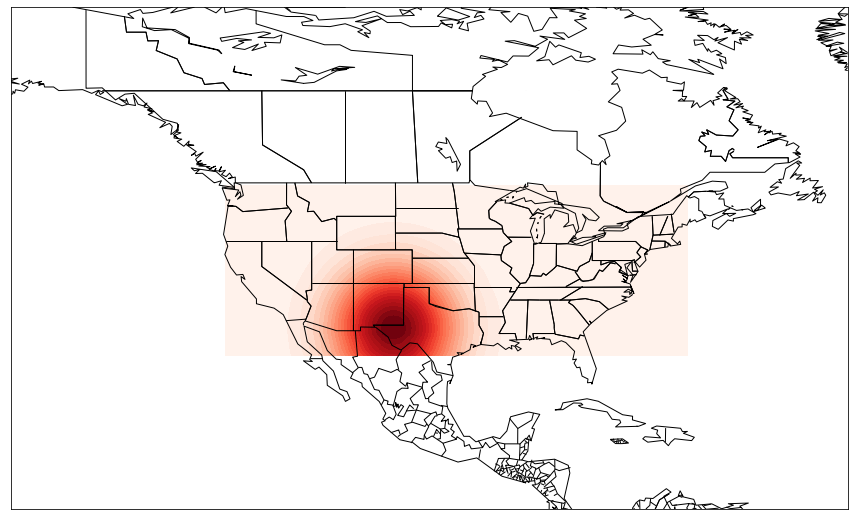

(None, None)

In [94]:
visualizeMap(Set7), visualizeMap(Set8)

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


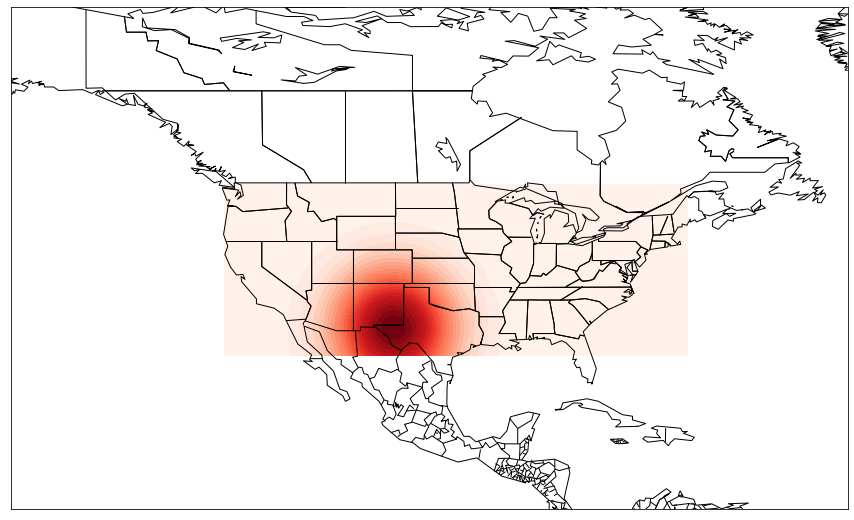

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


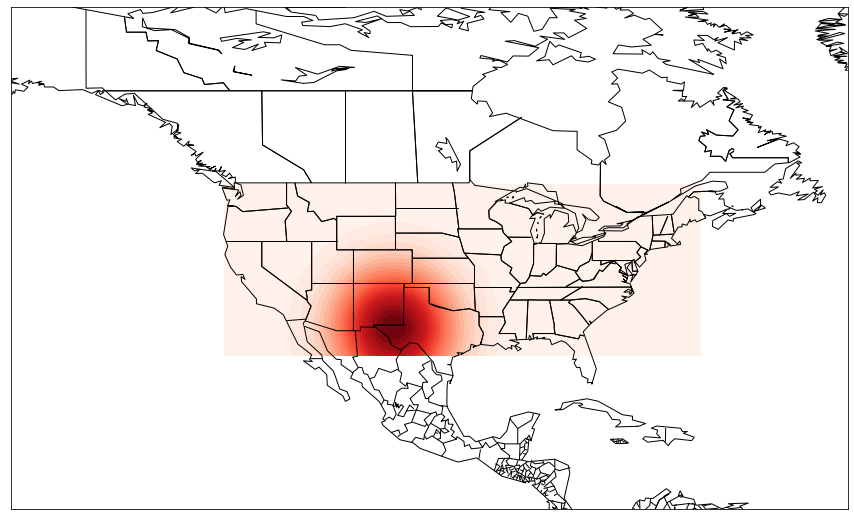

(None, None)

In [95]:
visualizeMap(Set9), visualizeMap(Set10)

In [ ]:
########################start of medium high hotspot########################

In [39]:
def mapSetUp2(dataset):
    # set up the data grid for the contour plot #
    hotspot2 = findMediumHighHotspots(dataset)
    ktest2 = hotspot2[['latitude', 'longitude']]
    
    xgrid2 = np.sort(list(dataset['longitude']))
    ygrid2 = np.sort(list(dataset['latitude']))
    x2, y2 = np.meshgrid(xgrid2, ygrid2)
    #print("X Grid Component:\n{}\n".format(x2))
    #print("Y Grid Component:\n{}\n".format(y2))

    xy2 = np.vstack([y2.ravel(), x2.ravel()]).T
    # run kernel density estimation for hotspot 2 #
    kde2 = sklearn.neighbors.KernelDensity(
        bandwidth=5, 
        metric='minkowski',
        kernel='gaussian', 
        algorithm='ball_tree'
    )
    kde2.fit(ktest2.values)

    # fit the trained model on the xy grid #
    log_density2 = kde2.score_samples(xy2)
    density2 = np.exp(log_density2)
    density2 = density2.reshape(x2.shape)
    #print("Shape of Density Values:\n{}\n".format(density2.shape))
    
    return x2, y2, density2


In [56]:
#--------------visualize the results for Hotspot 2--------------#
#PS takes a while to run
def visualizeMap2(dataset):
    fig15 = plt.figure(figsize=(15, 15))
    fig15.suptitle(
        """
        Density Estimation:
        Location of Earthquakes within the US
        With Magnitude >= 2.5
        """, 
        fontsize=16
    )

    the_map = mpl_toolkits.basemap.Basemap(
        projection='cyl',
        llcrnrlat=10, urcrnrlat=70,
        llcrnrlon=-150,urcrnrlon=-50,
        resolution='c'
    )

    the_map.drawcoastlines(linewidth=1)
    the_map.drawcountries(linewidth=1)
    the_map.drawstates(linewidth=1)

    """
    #turns polygons into points
    for i in hotspot1_Set1:
    the_map.scatter(hotspot1_Set1['longitude'], hotspot1_Set1['latitude'], latlon = True, s = 50, c = 'red')
    """
    
    hotspot_vals =  mapSetUp2(dataset)
    levels = np.linspace(0, hotspot_vals[2].max(), 25)
    plt.contourf(hotspot_vals[0], hotspot_vals[1], hotspot_vals[2], levels=levels, cmap=plt.cm.Reds)

    plt.show()
    


C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)
C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


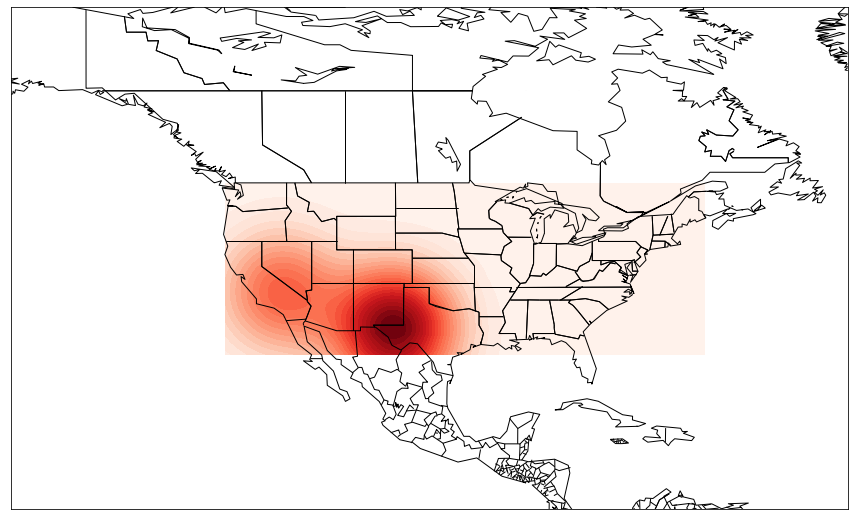

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


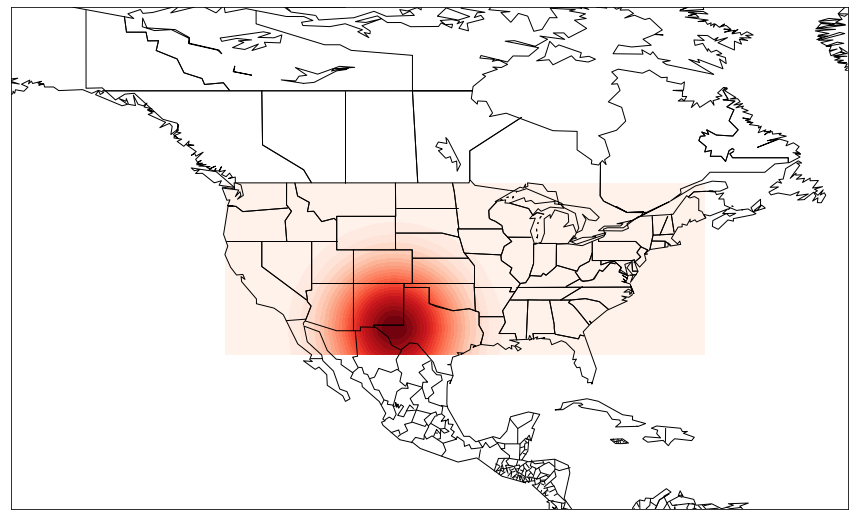

(None, None)

In [28]:
visualizeMap2(Set1),visualizeMap2(Set2)

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


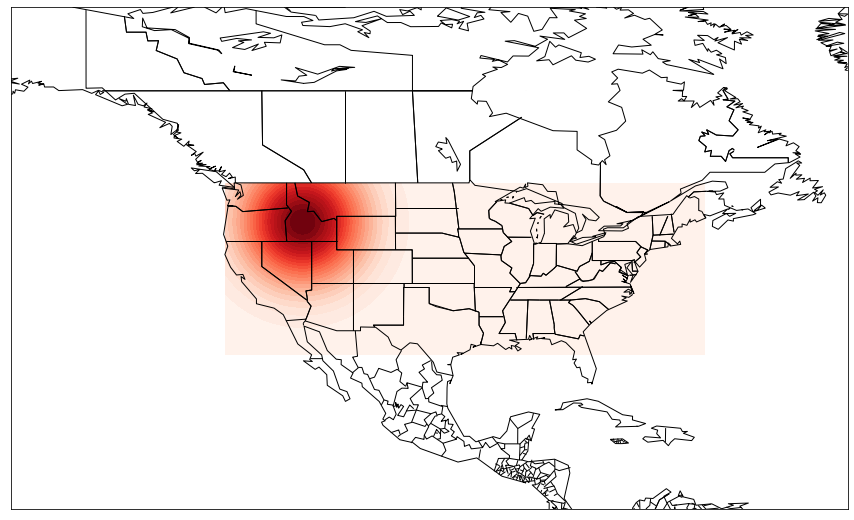

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)
C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


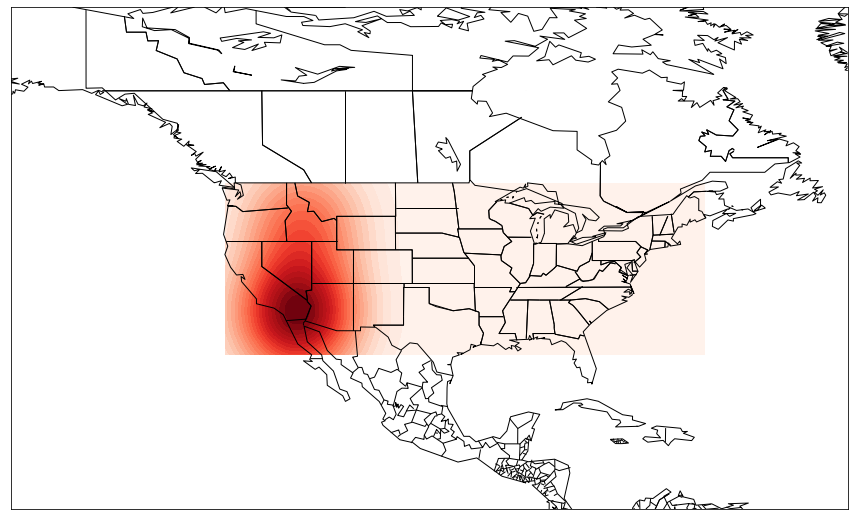

(None, None)

In [34]:
visualizeMap2(Set3),visualizeMap2(Set4)

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)
C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


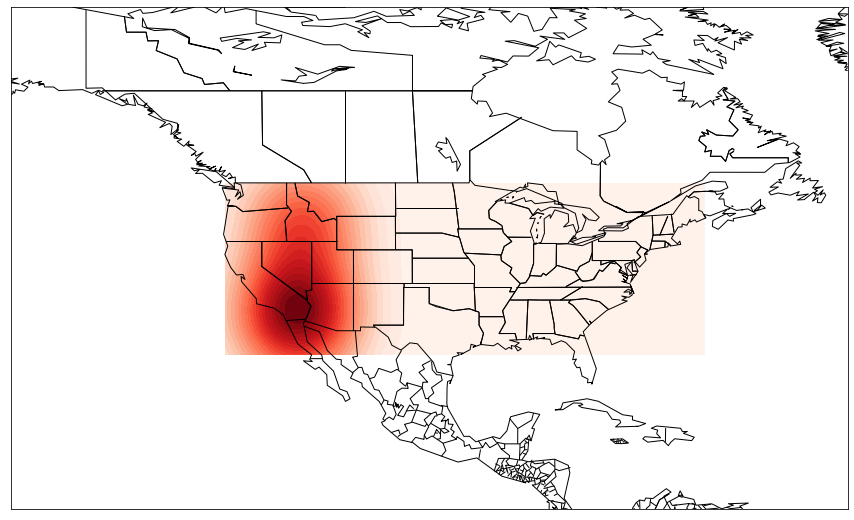

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)
C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


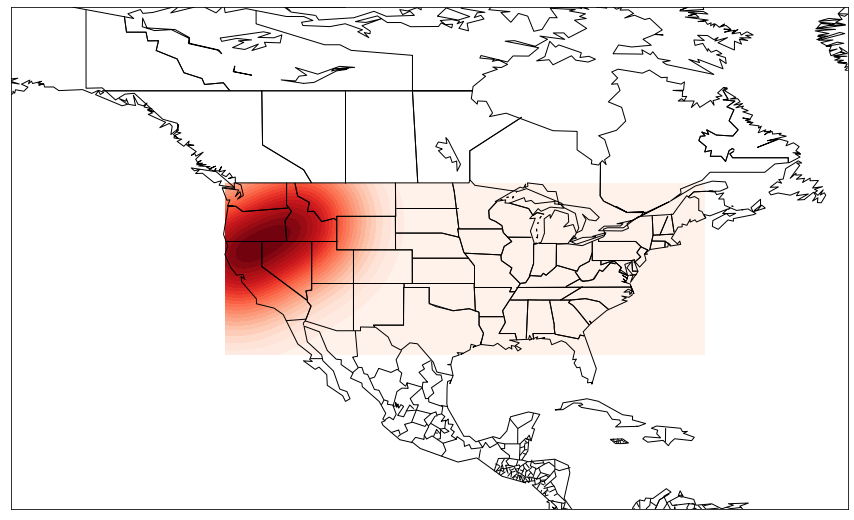

(None, None)

In [35]:
visualizeMap2(Set5),visualizeMap2(Set6)

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)
C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)
C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


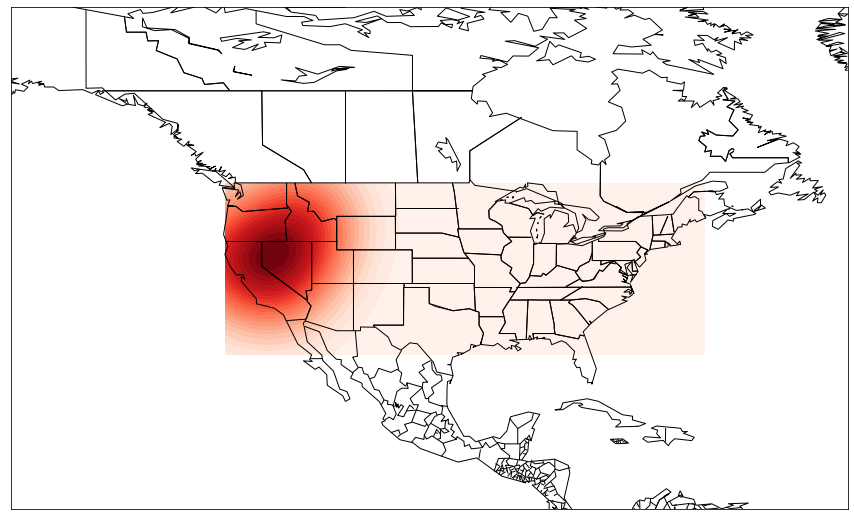

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)
C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)
C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


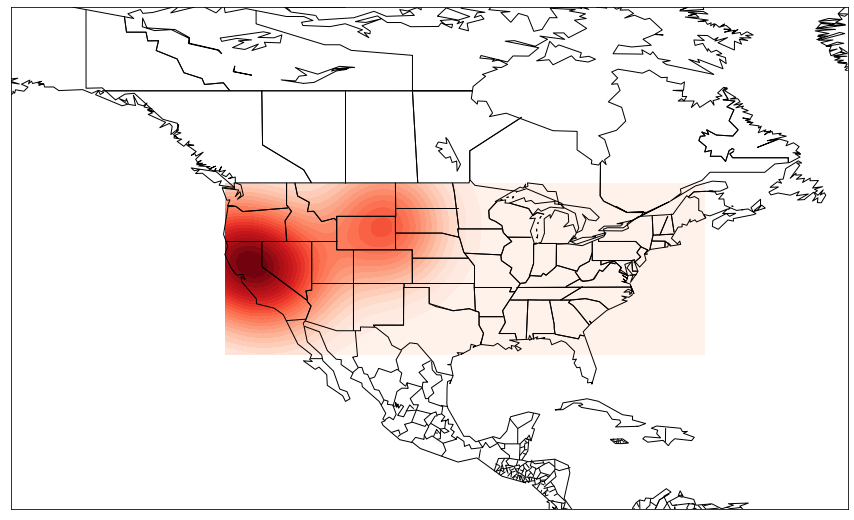

(None, None)

In [36]:
visualizeMap2(Set7),visualizeMap2(Set8)

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)
C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


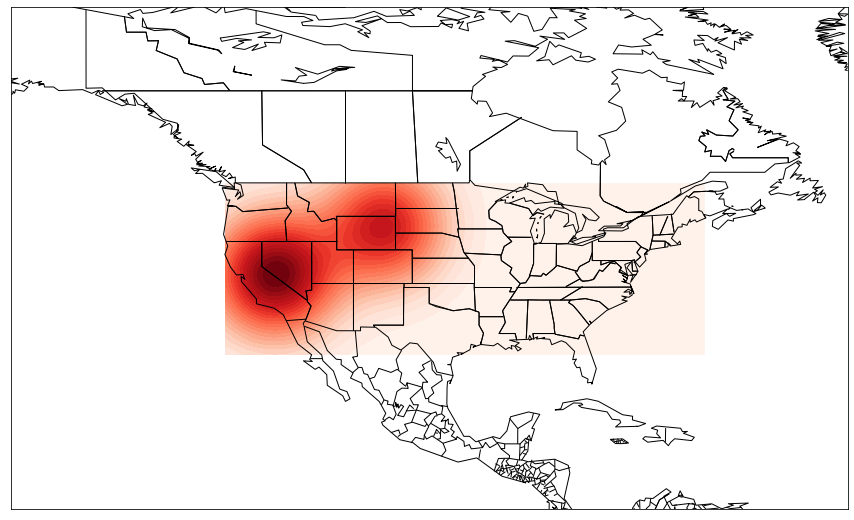

C:\Users\saima\AppData\Local\Temp\ipykernel_17300\2750432586.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append(n_cluster)


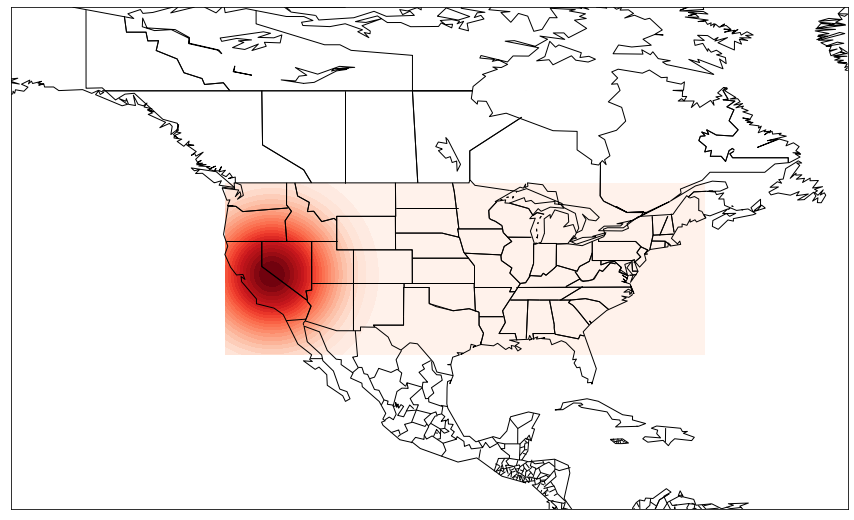

(None, None)

In [37]:
visualizeMap2(Set9),visualizeMap2(Set10)